In [189]:
import math
import numpy as np
import pandas as pd
# !pip3 install tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [190]:
def arrangement_1(nleds,d):

    l=math.sqrt(nleds);

    ledcord=np.zeros((2,nleds));

    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;

    return ledcord

def E_xy_cent(ledcord,nleds,Ir_0,z,d):
    
    x=0;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;
    
def E_xy_end(ledcord,nleds,Ir_0,z,d,x_end):
    
    x=x_end;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;

def plot_E_xy_full(ledcord,nleds,Ir_0,z,d):
    l=math.sqrt(nleds)
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)

    x,y=np.meshgrid(x, y, sparse=False, indexing='ij')

    E=np.zeros(np.size(x));

    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));
        
    return E;

def r()
#     s=surface(x,y,E);
#     xlabel('x-coordinate(m)');
#     ylabel('y-coordinate(m)');
#     zlabel('Irradinace(W/m^2)');
#     s.EdgeColor = 'none';


In [191]:
nleds=49;
Ir_0 = 0.1;
d=0.122292;
z=0.05;
ledcord = arrangement_1(nleds,d);
x_end=0.0;
print(E_xy_end(ledcord,nleds,Ir_0,z,d,x_end))

450.9825479895467


In [192]:
nleds=49;
Ir_0 = 0.1;

# print(plot_E_xy_full(ledcord,nleds,Ir_0,z,d))
# E_cent=E_xy_cent(ledcord,nleds,Ir_0,z,d)
# E_half = E_cent/2
# E_99 = E_cent * 0.99
# x_half = 0
# x_99 = 0
# x_half_flag = False
# x_99_flag = False

final_list = []

for d in tqdm(np.linspace(0.01,0.2,38)):
    ledcord = arrangement_1(nleds,d)
    for z in np.linspace(0.05,0.5,45):
        E_cent = E_xy_cent(ledcord,nleds,Ir_0,z,d)
        E_half = E_cent/2
        E_99 = E_cent * 0.99
        x_half = 0
        x_99 = 0
        x_half_flag = False
        x_99_flag = False
        
        for x_end in np.linspace(0,5,10000):
            E_end=E_xy_end(ledcord,nleds,Ir_0,z,d,x_end)

            if E_end < E_half and not x_half_flag:
                x_half = x_end
                x_half_flag = True

            if E_end < E_99 and not x_99_flag:
                x_99 = x_end
                x_99_flag = True

        final_list.append([d,z,E_cent,E_99, x_99,E_half,x_half])
# print(final_list)

 18%|█▊        | 7/38 [25:57<1:54:57, 222.49s/it]


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(final_list,columns=["d","z","E_cent","E_99","x_99","E_half","x_half"])

In [181]:
df["ratio"]=df["x_99"]/df["x_half"]

In [182]:
len(df["E_half"].unique())

1710

In [183]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
0,0.010000,0.050000,12004.167961,11884.126282,0.006001,6002.083981,0.046005,0.130435
1,0.010000,0.060227,9399.775102,9305.777351,0.006501,4699.887551,0.051005,0.127451
2,0.010000,0.070455,7478.400656,7403.616650,0.007001,3739.200328,0.056006,0.125000
3,0.010000,0.080682,6049.346928,5988.853459,0.007501,3024.673464,0.061506,0.121951
4,0.010000,0.090909,4971.291745,4921.578828,0.008001,2485.645873,0.067007,0.119403
5,0.010000,0.101136,4144.826236,4103.377974,0.008501,2072.413118,0.073007,0.116438
6,0.010000,0.111364,3500.934135,3465.924794,0.009001,1750.467067,0.079008,0.113924
7,0.010000,0.121591,2991.534665,2961.619319,0.010001,1495.767333,0.085009,0.117647
8,0.010000,0.131818,2582.769669,2556.941973,0.010501,1291.384835,0.091009,0.115385
9,0.010000,0.142045,2250.464144,2227.959503,0.011001,1125.232072,0.097010,0.113402


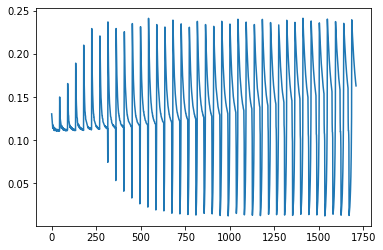

In [184]:
plt.plot(df["ratio"])

In [185]:
len(df["ratio"].unique())

1634

In [186]:
# ratio_max=max(df["ratio"])


In [187]:
df[df["ratio"] == df["ratio"].max()]

,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
1411,0.169189,0.213636,100.014195,99.014054,0.144014,50.007098,0.59706,0.241206


In [188]:
ef=df[df["ratio"] == df["ratio"].max()]
max(ef["E_cent"])

100.01419545514143

In [ ]:
edge = 0.04 
cent = 0
E_cent ( E_cent restirctions == time_restrictions) 
E_edge 
E_edge E_cent 